# MNIST Digit Classification using TensorFlow

###1. Import Libraries

In [1]:
import tensorflow as tf #pip install tensorflow
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten

### 2. Load and Explore the MNIST Dataset

In [2]:
mnist=tf.keras.datasets.mnist # This is basically handwritten characters based on 28x28 sized images of 0 to 9

In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data() # Split dataset into training and testing sets

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)



*   Training Data: 60,000 samples
*   Testing Data: 10,000 samples
*   Image Size: 28x28 pixels






### 3. Visualize a Sample Image

44422


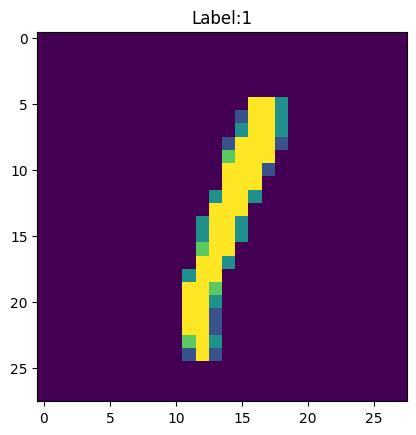

In [6]:
random_nr = np.random.randint(0, 60000)
print(random_nr)
plt.imshow(x_train[random_nr]);
plt.title(f"Label:{y_train[random_nr]}")
plt.show()


In [7]:
# Checking the values of each pixel
print(x_train[58661]) # before normalization
print(y_train[58661])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 172
  235  72   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2 227
  250 225  11   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  87 254
  109   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

### 4. Normalize and Reshape the Data
As images are in Gray level (1 channel ==> 0 to 255), not coloured (RGB)
Normalising the data | pre-processing step

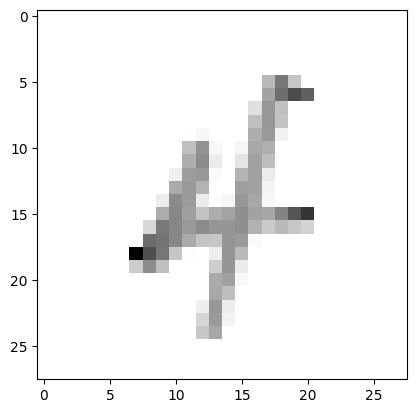

In [8]:
x_train = tf.keras.utils.normalize(x_train, axis =1)
x_test = tf.keras.utils.normalize(x_test, axis =1)
plt.imshow(x_train[58661], cmap=plt.cm.binary)

In [9]:
IMG_SIZE=28
x_trainr = np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1) # increasing one dimension
x_testr = np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)# increasing one dimension
y_trainr = np.array(y_train).reshape(-1,1)
y_testr = np.array(y_test).reshape(-1,1)
print("Training sample dimension after reshaping : ", x_trainr.shape)
print("Testing sample dimension after reshaping : ", x_testr.shape)
print("Target for training sample dimension after reshaping : ", y_trainr.shape)
print("Target for testing sample dimension after reshaping : ", y_testr.shape)

Training sample dimension after reshaping :  (60000, 28, 28, 1)
Testing sample dimension after reshaping :  (10000, 28, 28, 1)
Target for training sample dimension after reshaping :  (60000, 1)
Target for testing sample dimension after reshaping :  (10000, 1)


###5. Build and Compile the Neural Network

In [10]:
# Creating a Deep Neural Network
# Training on 60,000 samples of MNIST handwritten dataset
print(x_trainr.shape[1:])

(28, 28, 1)


In [11]:
# Creating a neural network now
model=Sequential()
model.add(Dense(14,input_shape=(28,28,1),activation='relu')) #28x28 image
model.add(Dense(20,activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 28, 28, 14)          │              28 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 28, 28, 20)          │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 15680)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │         156,810 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 157,138 (613.82 KB)

 Trainable params: 157,138 (613.82 KB)

 Non-trainable params: 0 (0.00 B)

###6. Train the Model

In [13]:
model.fit(x_trainr, y_trainr, epochs=5, validation_split=0.3) # Training my model

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 26s 19ms/step - accuracy: 0.8117 - loss: 0.7112 - val_accuracy: 0.9191 - val_loss: 0.2871
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.9205 - loss: 0.2777 - val_accuracy: 0.9159 - val_loss: 0.2953
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.9273 - loss: 0.2599 - val_accuracy: 0.9198 - val_loss: 0.2835
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 43s 19ms/step - accuracy: 0.9309 - loss: 0.2371 - val_accuracy: 0.9211 - val_loss: 0.2774
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.9341 - loss: 0.2287 - val_accuracy: 0.9272 - val_loss: 0.2574


###validation accuracy ~= accuracy this is how it should be
### if validation accuracy < accuracy this is overfitting => solution to overfitting is dropout layer

###7. Evaluate the Model

In [14]:
# Evaluateing on testing data on Mnist
test_loss, test_acc= model.evaluate(x_testr,y_testr)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9250 - loss: 0.2788


In [15]:
print("Test Loss on 10000 test samples",test_loss)
print("Validation Accuracy on 10000 test samples", test_acc)

Test Loss on 10000 test samples 0.2500620186328888
Validation Accuracy on 10000 test samples 0.9325000047683716


###8. Make Predictions

In [16]:
preedictions=model.predict([x_testr])

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


In [17]:
print(preedictions)

[[1.80097448e-08 3.30099229e-13 1.32162563e-06 ... 9.98466432e-01
  2.63551456e-08 3.91626018e-05]
 [5.47534546e-06 1.32868245e-05 9.98447835e-01 ... 5.75011294e-18
  2.71377885e-05 8.37762273e-14]
 [2.42989415e-07 9.97764766e-01 1.38088921e-03 ... 4.94357892e-06
  1.82628690e-04 6.45157934e-06]
 ...
 [2.96095219e-08 1.41489477e-06 7.05673210e-06 ... 9.63086844e-04
  4.09014942e-03 1.13129532e-02]
 [2.49003301e-06 1.33522315e-06 1.04314654e-06 ... 2.92806953e-06
  3.56357172e-02 6.83322639e-07]
 [1.10750851e-04 1.04444488e-10 9.31374438e-04 ... 1.12847877e-10
  7.51409289e-07 2.66002309e-09]]


In [18]:
# in order to undertstand , convert the predictions from one hot encoding, we need to use numpy for that
rn = np.random.randint(0, 10000)
print(np.argmax(preedictions[rn])) #so actually argmax will find the maximim value index and find the value of it

2


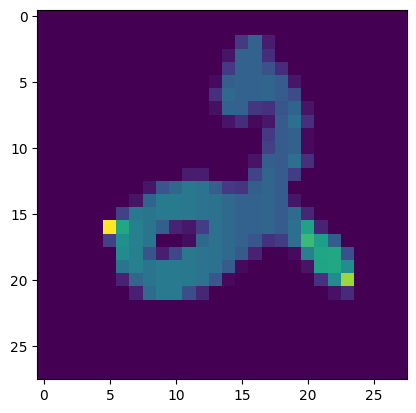

In [19]:
#now to check that is our answer is true or not
plt.imshow(x_test[rn])